In [6]:
import csv
import re
import sklearn
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [7]:
df = pd.read_csv('coba-lexi.csv')

In [8]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(df['Bobot'], df['Label'], test_size=0.1, random_state=0)

In [10]:
x_train = np.reshape(x_train.values, (-1, 1))
x_test = np.reshape(x_test.values, (-1,1))

In [12]:
x_train.shape

(4957, 1)

In [13]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [14]:
SVM.score(x_test, y_test)

1.0

In [15]:
predictions_SVM = SVM.predict(x_test)
predictions_SVM

array(['positif', 'positif', 'positif', 'positif', 'positif', 'negatif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'netral',
       'positif', 'netral', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'netral',
       'positif', 'positif', 'negatif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'negatif', 'positif', 'netral', 'negatif',
       'positif', 'negatif', 'netral', 'negatif', 'positif', 'positif',
       'positif', 'netral', 'positif', 'netral', 'positif', 'negatif',
       'netral', 'positif', 'positif', 'negatif', 'positif', 'negatif',
       'positif', 'negatif', 'netral', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'netral', 'negatif', 'positif', 'positif', 'positif',
       'negatif', 'netral', 'positif', 'netral', 'netral', 'netral',
       'netral', 'positif', 'positif', 'positif', 'positif', 'pos

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, predictions_SVM)

print('Confusion Matrix : ') 
print(confusion_matrix)
print('\n Report Hasil : ') 
print(classification_report(y_test, predictions_SVM))

Confusion Matrix : 
[[ 72   0   0]
 [  0  78   0]
 [  0   0 401]]

 Report Hasil : 
              precision    recall  f1-score   support

     negatif       1.00      1.00      1.00        72
      netral       1.00      1.00      1.00        78
     positif       1.00      1.00      1.00       401

    accuracy                           1.00       551
   macro avg       1.00      1.00      1.00       551
weighted avg       1.00      1.00      1.00       551



In [5]:
train_reshape = np.reshape(df['Bobot'], (-1, 1))
test_reshape = np.reshape(df['Bobot'], (-1, 1))

ValueError: No axis named (-1, 1) for object type Series

In [25]:
np.array(df['Bobot'].tolist())

array([1, 1, 0, ..., 1, 1, 1])

In [19]:
yeah = [str (item) for item in df['Sentimen']]

In [21]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(yeah, df['Label'], test_size=0.1, random_state=0)

In [11]:
tfidf_vectorizer=TfidfVectorizer()
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [12]:
from sklearn import svm

clf = svm.SVC(kernel='linear', probability=True)
clf.fit(train_reshape, y_train)

SVC(kernel='linear', probability=True)

In [13]:
y_pred = clf.fit(train_reshape, y_train).predict(test_reshape)
cm = metrics.confusion_matrix(y_test, y_pred)

In [14]:
cm

array([[ 72,   0,   0],
       [  0,  78,   0],
       [  0,   0, 401]], dtype=int64)

In [22]:
preds = list(test_reshape)    #predicted class labels to feed into the confusion matrix
actuals = list(train_reshape)  #actual class labels

cm = confusion_matrix(actuals, preds)
cm.print_stats()

ValueError: Found input variables with inconsistent numbers of samples: [4957, 551]

In [18]:
clf.score(test_reshape, y_test)

1.0

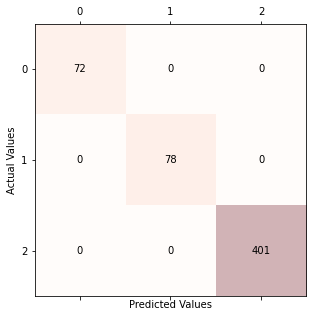

              precision    recall  f1-score   support

     negatif       1.00      1.00      1.00        72
      netral       1.00      1.00      1.00        78
     positif       1.00      1.00      1.00       401

    accuracy                           1.00       551
   macro avg       1.00      1.00      1.00       551
weighted avg       1.00      1.00      1.00       551



In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))